<h1>Análise e Correlações do Preço do Frete na Importação</h1>
<hr>

## Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

import re

## Abertura do dados
---


### Importação Brasil
Link: [Ministério da Economia](https://balanca.economia.gov.br/balanca/bd/comexstat-bd/ncm/IMP_COMPLETA.zip)

In [3]:
#df_importacao = pd.read_csv("/content/drive/Shareddrives/TCC Daniel dados/IMP_COMPLETA.csv",sep=';')
df_importacao = pd.read_csv('../datasets/IMP_COMPLETA.csv',sep=';')
df_importacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36389808 entries, 0 to 36389807
Data columns (total 13 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   CO_ANO      int64 
 1   CO_MES      int64 
 2   CO_NCM      int64 
 3   CO_UNID     int64 
 4   CO_PAIS     int64 
 5   SG_UF_NCM   object
 6   CO_VIA      int64 
 7   CO_URF      int64 
 8   QT_ESTAT    int64 
 9   KG_LIQUIDO  int64 
 10  VL_FOB      int64 
 11  VL_FRETE    int64 
 12  VL_SEGURO   int64 
dtypes: int64(12), object(1)
memory usage: 3.5+ GB


In [34]:
print(f'Menor ano: {df_importacao.CO_ANO.min()}\nMaior ano: {df_importacao.CO_ANO.max()}')

Menor ano: 1997
Maior ano: 2022


In [36]:
df_importacao = df_importacao[df_importacao.CO_ANO >= 2012]
df_importacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18689502 entries, 17700306 to 36389807
Data columns (total 13 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   CO_ANO      int32 
 1   CO_MES      int64 
 2   CO_NCM      int64 
 3   CO_UNID     int64 
 4   CO_PAIS     int64 
 5   SG_UF_NCM   object
 6   CO_VIA      int64 
 7   CO_URF      int64 
 8   QT_ESTAT    int64 
 9   KG_LIQUIDO  int64 
 10  VL_FOB      int64 
 11  VL_FRETE    int64 
 12  VL_SEGURO   int64 
dtypes: int32(1), int64(11), object(1)
memory usage: 1.9+ GB


## Tabelas auxiliares
---
Link: [Tabela Códigos](https://balanca.economia.gov.br/balanca/bd/tabelas/TABELAS_AUXILIARES.xlsx)

Indice Excel usado
* 1 (NO_SH4_POR): Classe pertencente ao produto
* 10 (CO_PAIS): País de origem do produto
* 14 (CO_VIA): Meio de transporte da mercadoria
* 15 (CO_URF): Local de chegada no Brasil da mercadoria
* 12 (SG_UF): Sigla do estado de origem


Da mesma forma, a formatação dos dados está correta e também não há dados nulos não havendo necessidade de tratá-los.

In [37]:
############ Tabela disponível no github ############

#url = "https://github.com/Migliorin/Comex_Data_Analysis/blob/main/datasets/TABELAS_AUXILIARES.xlsx?raw=true"
#xl_file = pd.ExcelFile(url)

#####################################################

xl_file = pd.ExcelFile('../datasets/TABELAS_AUXILIARES.xlsx')
df_pais = xl_file.parse('10')
df_ncm = xl_file.parse('1')
df_via = xl_file.parse('14')
df_urf = xl_file.parse('15')
df_uf = xl_file.parse('12')

In [ ]:
df_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CO_PAIS        281 non-null    int64 
 1   CO_PAIS_ISON3  281 non-null    int64 
 2   CO_PAIS_ISOA3  281 non-null    object
 3   NO_PAIS        281 non-null    object
 4   NO_PAIS_ING    281 non-null    object
 5   NO_PAIS_ESP    281 non-null    object
dtypes: int64(2), object(4)
memory usage: 13.3+ KB


In [ ]:
df_ncm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13164 entries, 0 to 13163
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CO_NCM         13164 non-null  int64 
 1   NO_NCM_POR     13164 non-null  object
 2   CO_ISIC_SECAO  13164 non-null  object
 3   NO_ISIC_SECAO  13164 non-null  object
 4   CO_CUCI_GRUPO  13164 non-null  object
 5   NO_CUCI_GRUPO  13164 non-null  object
dtypes: int64(1), object(5)
memory usage: 617.2+ KB


In [ ]:
df_via.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CO_VIA  17 non-null     int64 
 1   NO_VIA  17 non-null     object
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [ ]:
df_urf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CO_URF  276 non-null    int64 
 1   NO_URF  276 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [ ]:
df_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CO_UF      34 non-null     int64 
 1   SG_UF      34 non-null     object
 2   NO_UF      34 non-null     object
 3   NO_REGIAO  34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


## Dados nulos Importações
---
No dataset de Importações não há presença de valores nulos não havendo necessidade de tratá-los.

In [5]:
df_importacao.isnull().sum()

CO_ANO        0
CO_MES        0
CO_NCM        0
CO_UNID       0
CO_PAIS       0
SG_UF_NCM     0
CO_VIA        0
CO_URF        0
QT_ESTAT      0
KG_LIQUIDO    0
VL_FOB        0
VL_FRETE      0
VL_SEGURO     0
dtype: int64

## Substituição código
---
Para melhor análise e entedimento, será usado a tabela de códigos para substituir os códigos dentro da base bruta. Como as colunas de alguns códigos serão traduzidas, então serão retirados as seguintes colunas:

* CO_NCM
* CO_PAIS
* CO_VIA
* CO_URF
* SG_UF_NCM

**Variável final**: df

In [38]:
df = df_importacao.merge(df_ncm[['CO_NCM','NO_SH4_POR']],on='CO_NCM').copy()
df = df.merge(df_pais[['CO_PAIS','NO_PAIS']],on='CO_PAIS')
df = df.merge(df_urf[['CO_URF','NO_URF']],on='CO_URF')
df = df.merge(df_via[['CO_VIA','NO_VIA']],on='CO_VIA')

df.rename({'SG_UF_NCM':'SG_UF'},axis=1,inplace=True)

df = df.merge(df_uf[['SG_UF','NO_REGIAO']],on='SG_UF')

In [39]:
df.drop(['CO_NCM','CO_PAIS','CO_URF','CO_VIA'],axis=1,inplace=True)

## Visualização do dataset

In [40]:
df.head()

,CO_ANO,CO_MES,CO_UNID,SG_UF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO,NO_SH4_POR,NO_PAIS,NO_URF,NO_VIA,NO_REGIAO
0,2012,10,10,SP,0,0,134,24,0,"Fios, cabos (incluídos os cabos coaxiais) e ou...",Japão,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,AEREA,REGIAO SUDESTE
1,2012,9,10,SP,1,1,583,10,1,"Fios, cabos (incluídos os cabos coaxiais) e ou...",Japão,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,AEREA,REGIAO SUDESTE
2,2012,12,10,SP,1,1,722,10,0,"Fios, cabos (incluídos os cabos coaxiais) e ou...",Japão,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,AEREA,REGIAO SUDESTE
3,2012,8,10,SP,1,1,488,18,0,"Fios, cabos (incluídos os cabos coaxiais) e ou...",Japão,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,AEREA,REGIAO SUDESTE
4,2012,7,10,SP,1,1,1187,15,0,"Fios, cabos (incluídos os cabos coaxiais) e ou...",Japão,0817700 - AEROPORTO INTERNACIONAL DE VIRACOPOS,AEREA,REGIAO SUDESTE


## Visualização dos dados

### Países
---
Número de importações feitas para o Brasil listando os 15+ países de origem. De 1997 a 2022, os 5 países que mais exportaram para o Brasil foram:

1. Estados Unidos
2. China
3. Alemanha
4. Italia
5. Japão

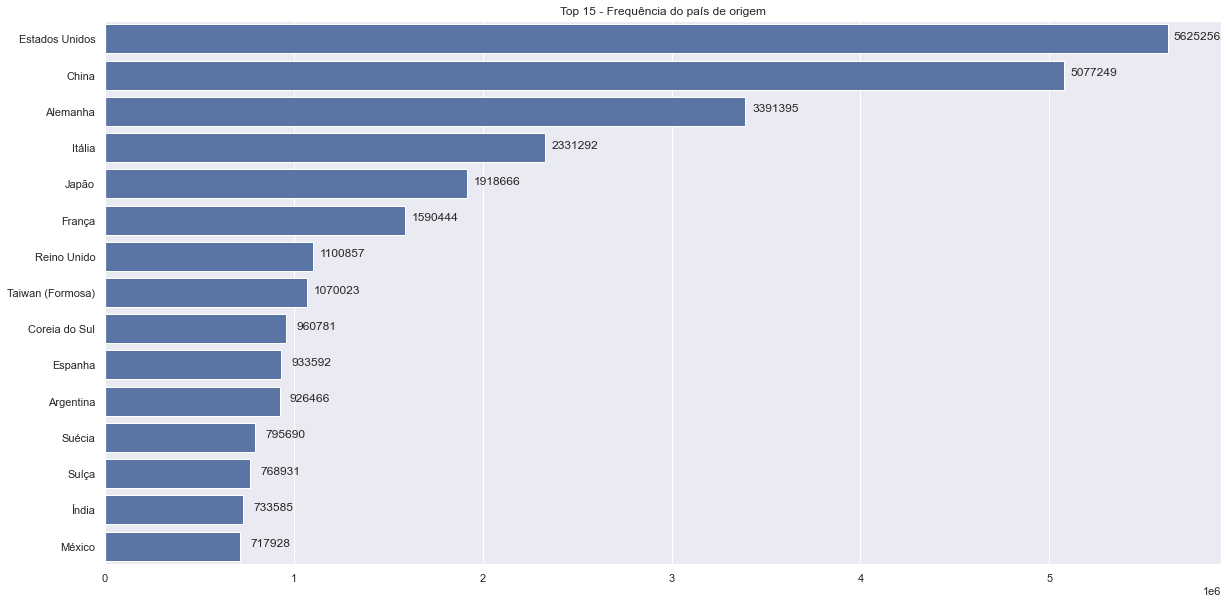

In [ ]:
sns.set_theme(style="darkgrid")

# Contagem valores
count = df.NO_PAIS.value_counts()

# Inicializacao figura matplotlib
f, ax = plt.subplots(figsize=(20, 10))
bar = sns.barplot(x=list(count)[:15], y=list(count.index)[:15],
            label="Total", color="b")

for p in bar.patches:
    bar.annotate(int(p.get_width()), 
                   (p.get_width() + p.get_x(), p.get_y()), 
                   ha = 'center', va = 'center', 
                   xytext = (30, -12), 
                   textcoords = 'offset points')
    

ax.set_title("Top 15 - Frequência do país de origem")
plt.show()

### Destino
---
Destino final das mercadorias predominando a região Sudeste como o principal destino, enquanto a região Norte fica em terceiro lugar.

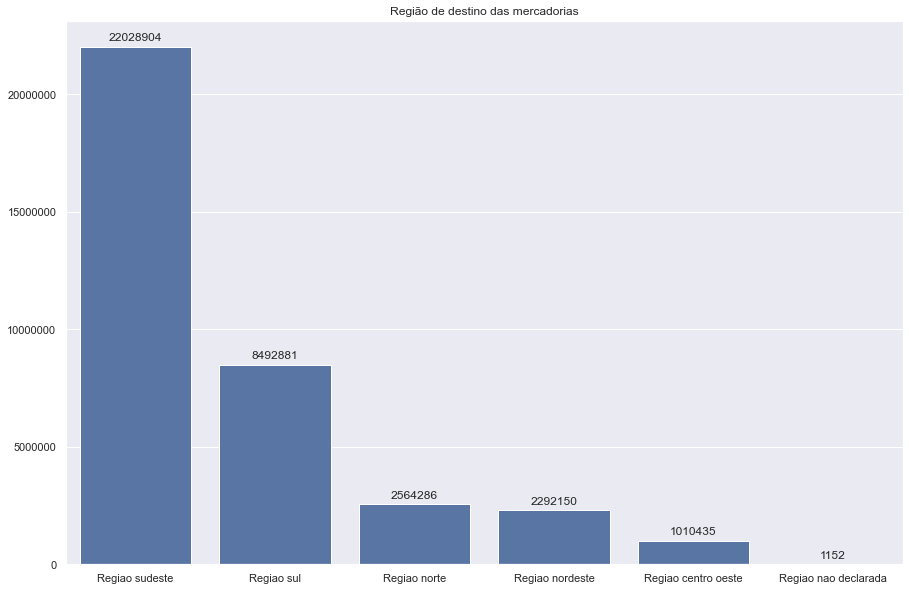

In [ ]:
sns.set_theme(style="darkgrid")

# Contagem valores
count = df.NO_REGIAO.value_counts()

# Inicializacao figura matplotlib
f, ax = plt.subplots(figsize=(15, 10))
bar = sns.barplot(y=list(count), x=[x.lower().capitalize() for x in count.index],
            label="Total", color="b")

for p in bar.patches:
    bar.annotate(int(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    

ax.set_title("Região de destino das mercadorias")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: int(y)))
plt.show()

## Vias de transporte
---

Abaixo mostra o gráfico da quantidade de vezes que as vias de transporte foram usadas e sua porcentagem em relação ao todo. As vias mais utilizadas são a **Aerea**, **Marítima** e **Rodoviária**. As vias de transporte dentro do dataset são:

1. Aerea
2. Maritima
3. Rodoviaria
4. Entrada/saida ficta
5. Postal
6. Meios proprios
7. Ferroviaria
8. Conduto/rede de transmissao
9. Fluvial
10. Courier
11. Lacustre

Para melhor visualização, as demais vias serão incluídas na categoria "Outros" sendo assim **Aerea**, **Marítima**, **Rodoviária** e **Outras** as novas categorias de vias.

**Contagem da quantidade**

In [ ]:
# Contagem dos valores
count = df.NO_VIA.value_counts()

total = count.sum()

**Visão geral da quantidade**

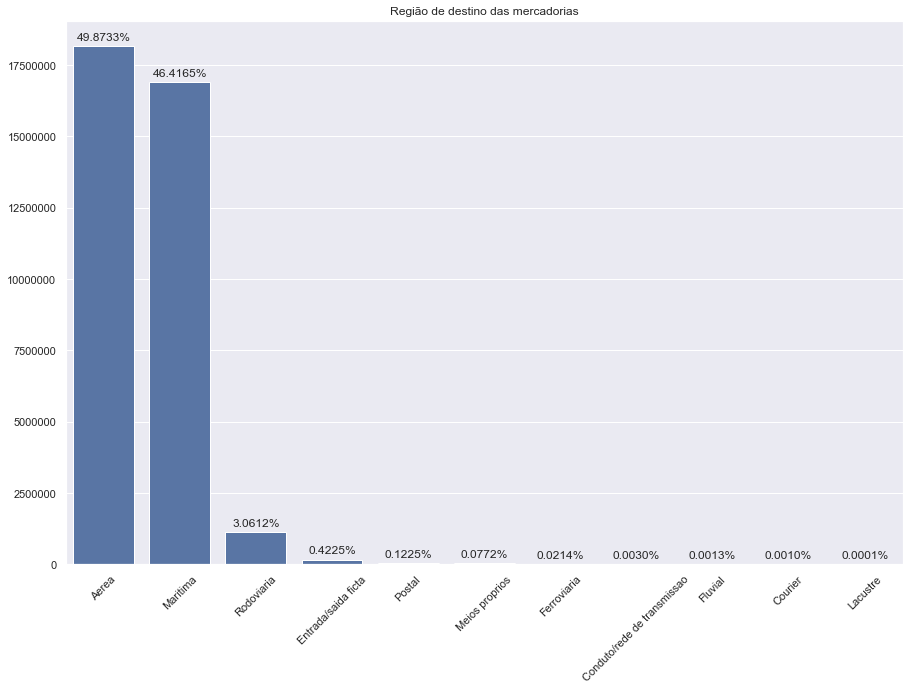

In [ ]:
vias = pd.DataFrame(count)
vias.rename({'NO_VIA':'quantidade'},axis=1,inplace=True)

vias['porcentagem'] = vias.quantidade.apply(lambda x: x/total)

# Escolhendo o tema
sns.set_theme(style="darkgrid")


# Inicializacao figura matplotlib
f, ax = plt.subplots(figsize=(15, 10))
bar = sns.barplot(y=list(vias.quantidade), x=[x.lower().capitalize() for x  in vias.index],
            label="Total", color="b")

for i,p in enumerate(bar.patches):
    bar.annotate('{:.4f}%'.format((vias.porcentagem[i])*100), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    

ax.set_title("Região de destino das mercadorias")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: int(y)))
plt.xticks(rotation=45)
plt.show()

**Visão após a substituição**

In [ ]:
# Mudanca dos nomes

outros_qtd = vias.iloc[3:,:].quantidade.sum()
vias = vias.iloc[:3]
df_outros = pd.DataFrame({'quantidade' : outros_qtd,'porcentagem':outros_qtd/total},index=['Outros'])
vias = pd.concat([vias,df_outros])

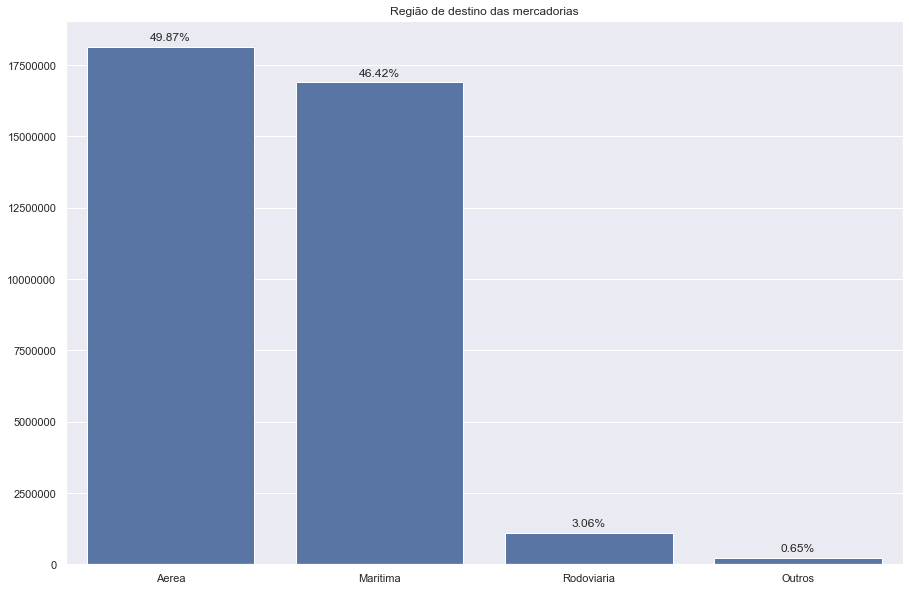

In [ ]:
# Escolhendo o tema
sns.set_theme(style="darkgrid")


# Inicializacao figura matplotlib
f, ax = plt.subplots(figsize=(15, 10))
bar = sns.barplot(y=list(vias.quantidade), x=[x.lower().capitalize() for x  in vias.index],
            label="Total", color="b")

for i,p in enumerate(bar.patches):
    bar.annotate('{:.2f}%'.format((vias.porcentagem[i])*100), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    

ax.set_title("Região de destino das mercadorias")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: int(y)))
#plt.xticks(rotation=45)
plt.show()

**Mudança no dataset principal**

In [50]:
# Substituicao para a classe 'Outros'

df.NO_VIA = df.NO_VIA.apply(lambda x : 'OUTROS' if x not in ['AEREA','MARITIMA','RODOVIARIA'] else x)

## Produtos
---

Nesse gráfico é mostrado os 10 produtos mais importados desde de 1997 até 2022 e os meios em que os produtos foram importados.

Para uma melhor análise das proporções aplicou-se a função logarítmica pela presença de valores muito distantes para a quantidade transportada pelas vias

A maioria dos produtos são peças ou equipamentos de empresas/industrias. Os 10 produtos importados em ordem descrecente:

1. Condensadores elétricos, fixos, variáveis ou ajustáveis
2. Resistências elétricas (incluídos os reóstatos e os potenciómetros), exceto de aquecimento
3. Hulhas; briquetes, bolas e combustíveis sólidos semelhantes, obtidos a partir da hulha
4. Gás de petróleo e outros hidrocarbonetos gasosos
5. Adubos (fertilizantes) minerais ou químicos, potássicos
6. Díodos, transístores e dispositivos semelhantes com semicondutores; dispositivos fotossensíveis semicondutores, incluídas as células fotovoltaicas, mesmo montadas em módulos ou em painéis; díodos emissores de luz; cristais piezoelétricos montados
7. Trigo e mistura de trigo com centeio
8. Adubos (fertilizantes) minerais ou químicos, azotados
9. Aparelhos para interrupção, seccionamento, protecção, derivação, ligação ou conexão de circuitos elétricos (por exemplo: interruptores, comutadores, relés, corta-circuitos, eliminadores de onda, tomadas de corrente, machos e fêmeas, suportes para lâmpada
10. Adubos (fertilizantes) minerais ou químicos, contendo dois ou três dos seguintes elementos fertilizantes: azoto (nitrogénio), fósforo e potássio; outros adubos (fertilizantes); produtos do presente capítulo apresentados em tabletes ou formas semelhantes


In [51]:
aa = df.groupby(['NO_SH4_POR']).sum().sort_values(by=['QT_ESTAT'],ascending=False)
aa = aa.iloc[:10,:][['QT_ESTAT']]
aa.reset_index(inplace=True)

total = aa.copy()

In [52]:
aa = df.groupby(['NO_SH4_POR','NO_VIA']).sum().sort_values(by=['QT_ESTAT'],ascending=False)

aa.reset_index(inplace=True)

In [53]:
final = aa.merge(total,on=['NO_SH4_POR'],how='left')

final = final.rename({'QT_ESTAT_x':'QT_VIA','QT_ESTAT_y':'TOTAL'},axis=1).sort_values(by=['TOTAL'],ascending=False)

final = final[final.NO_SH4_POR.apply(lambda x: True if x in list(total.NO_SH4_POR) else False)]
final = final[['NO_SH4_POR','NO_VIA','QT_VIA','TOTAL']]
final.reset_index(inplace=True)

In [54]:
produtos = list(final.NO_SH4_POR.value_counts().index)
produtos.sort()

In [55]:
df_final = []

for prod in produtos:
    aux = final[final.NO_SH4_POR == prod][['NO_VIA','QT_VIA']]
    df_final.append(pd.DataFrame([list(aux['QT_VIA'])],columns=list(aux['NO_VIA']),index=[prod]))

df_final = pd.concat(df_final)

df_final.fillna(0,inplace=True)

In [56]:
df_final.reset_index(inplace=True)

In [57]:
def format_text(text:str):
    aux = ''
    count = 0
    for word in re.findall(r'\w+',text):
        if(count == 8):
            aux += word + '\n'
            count = 0
        else:
            aux += word + ' '
        count += 1
    return aux

In [58]:
df_final['index'] = df_final['index'].apply(lambda x: format_text(x))

soma = []

for row_ in df_final.iloc:
    soma.append(row_['AEREA'] + row_['RODOVIARIA']+row_['MARITIMA']+row_['OUTROS'])
df_final['total'] = soma

df_final.sort_values(by=['total'],ascending=True,inplace=True)

C:\Users\Lucas Migliorin\AppData\Local\Temp\ipykernel_7132\3640463511.py:27: RuntimeWarning: divide by zero encountered in log
  ax.barh(row_["index"],np.log(row_["OUTROS"]), left=np.log(row_["AEREA"]) + np.log(row_["RODOVIARIA"]) + np.log(row_["MARITIMA"]), color="r")
C:\Users\Lucas Migliorin\AppData\Local\Temp\ipykernel_7132\3640463511.py:29: RuntimeWarning: divide by zero encountered in log
  (np.log(row_["AEREA"]) + np.log(row_["RODOVIARIA"]) + np.log(row_["MARITIMA"]) + np.log(row_["OUTROS"])) -7
posx and posy should be finite values
C:\Python310\lib\site-packages\matplotlib\transforms.py:378: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]
posx and posy should be finite values


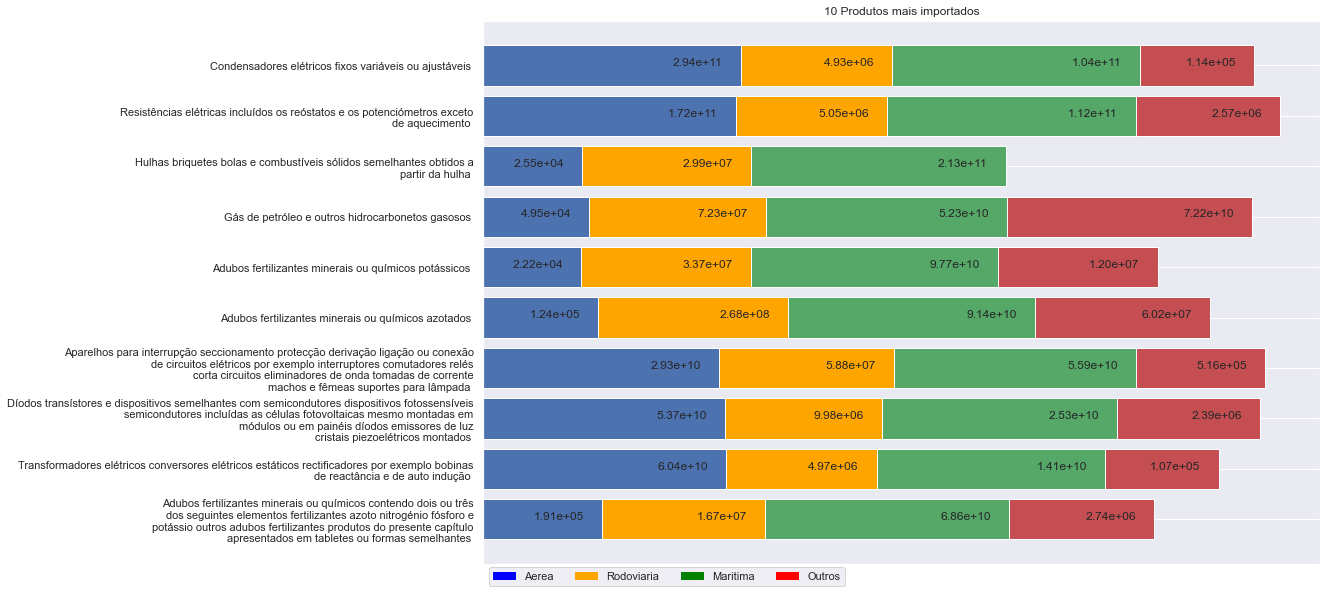

In [59]:
# Escolhendo o tema
sns.set_theme(style="darkgrid")


# Inicializacao figura matplotlib
f, ax = plt.subplots(figsize=(15, 10))

for i,row_ in enumerate(df_final.iloc):
    bar = ax.barh(row_['index'],np.log(row_["AEREA"]), color="b")
    ax.text(
        np.log(row_["AEREA"]) -7,
        i,
        np.format_float_scientific(row_["AEREA"], unique=False, precision=2))

    ax.barh(row_["index"],np.log(row_["RODOVIARIA"]), left=np.log(row_["AEREA"]), color="orange")
    ax.text(
        (np.log(row_["AEREA"]) + np.log(row_["RODOVIARIA"])) -7
        ,i
        ,np.format_float_scientific(row_["RODOVIARIA"], unique=False, precision=2))

    ax.barh(row_["index"],np.log(row_["MARITIMA"]), left=np.log(row_["AEREA"]) + np.log(row_["RODOVIARIA"]), color="g")
    ax.text(
        (np.log(row_["AEREA"]) + np.log(row_["RODOVIARIA"]) + np.log(row_["MARITIMA"])) -7
        ,i
        ,np.format_float_scientific(row_["MARITIMA"], unique=False, precision=2))

    ax.barh(row_["index"],np.log(row_["OUTROS"]), left=np.log(row_["AEREA"]) + np.log(row_["RODOVIARIA"]) + np.log(row_["MARITIMA"]), color="r")
    ax.text(
        (np.log(row_["AEREA"]) + np.log(row_["RODOVIARIA"]) + np.log(row_["MARITIMA"]) + np.log(row_["OUTROS"])) -7
        ,i
        ,np.format_float_scientific(row_["OUTROS"], unique=False, precision=2))

#plt.legend()
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#         rotation_mode="anchor")
ax.xaxis.set_visible(False)

plt.legend(handles=[
    mpatches.Patch(color='blue', label='Aerea'),
    mpatches.Patch(color='orange', label='Rodoviaria'),
    mpatches.Patch(color='green', label='Maritima'),
    mpatches.Patch(color='red', label='Outros')
],loc='lower left',ncol=4, bbox_to_anchor=(0, -0.05))

plt.title('10 Produtos mais importados')
plt.show()

Para uma análise mais precisa sobre o objetivo no qual é prever o valor do frete, limitou-se o produto para **Aparelhos elétricos para ligação, proteção ou conexão de circuitos** por ser o que mais foi importado.

Dessa forma, separou-se essa mercadoria das demais criando um novo DataFrame.

O código para essa classe de mercadoria é "85322410" de acordo com a Nomenclatura Comum do Mercosul (NCM) 

**DataFrame**: df_produto

In [60]:
posi = []
for i,sh in tqdm(enumerate(df.NO_SH4_POR),total=len(df.NO_SH4_POR)):
    if(sh in list(total.NO_SH4_POR)):
        posi.append(i)

# Exportando
df_importacao.iloc[posi].to_csv('../datasets/condensadores.csv',index=False)

  0%|          | 0/18689502 [00:00<?, ?it/s]

## Dolar Série Histórica
---
Após a análise e separação da mercadoria, escolheu-se a variação da cotação do dolar para investigar se há alguma relação entre ela e o preço do frete do produto.

A base de dados foi retirada do Centro de Estudos Avançados em Economia Aplicada (CEPEA) -- Universidade de São Paulo (USP) -- contendo variações da cotação de 1996 à 2022/01

Link: [Dolar Serie Historica](https://www.cepea.esalq.usp.br/br/serie-de-preco/dolar.aspx)

In [ ]:
df_dolar = pd.read_csv("../datasets/export_series_dolar.csv")
df_dolar.columns = ['data','valor']
df_dolar = df_dolar.iloc[:-1,:]
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    6397 non-null   object
 1   valor   6397 non-null   object
dtypes: object(2)
memory usage: 100.1+ KB


## Análise Gráfica Dolar
---

In [ ]:
df_dolar.data = pd.to_datetime(df_dolar.data.apply(lambda x: "-".join(x.split('/')[::-1])))

df_dolar.valor = df_dolar.valor.apply(lambda x: float(x.replace(',','.')))

In [ ]:
ano = []
mes = []
for data in df_dolar.data:
    ano.append(int(data.year))
    mes.append(int(data.month))

df_dolar['ano'] = ano
df_dolar['mes'] = mes

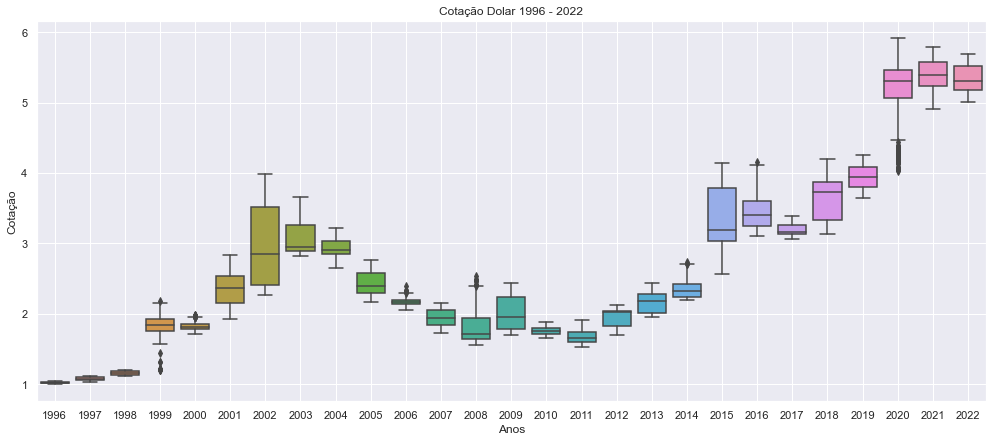

In [ ]:
# Configurando tema
sns.set_theme(style="darkgrid")

# Configurando tamanho da figura
fig, ax = plt.subplots(figsize=(17,7))

sns.boxplot(data=df_dolar[['ano','valor']],y='valor',x='ano')
ax.set_title("Cotação Dolar 1996 - 2022")
ax.set_ylabel("Cotação")
ax.set_xlabel("Anos")
plt.grid(True)

plt.show()

## Unindo Datasets - Dolar e Importações
---
Para inverstigar uma correlação entre os dados de importações e a cotação do dolar, uniu-se a base de dados de **Importações** do produto "85322410" com a do **Dolar**.

In [61]:
# Importacao
#df_produto = pd.read_csv('../datasets/85322410.csv')
df_produto = pd.read_csv('../datasets/condensadores.csv')

# Dolar
#df_dolar = pd.read_csv("../datasets/export_series_dolar.csv")
df_dolar = pd.read_csv("../datasets/export_series_dolar.csv")
df_dolar.columns = ['data','valor']
df_dolar = df_dolar.iloc[:-1,:]

**Removendo 'Unamed: 0'**

In [62]:
if('Unnamed: 0' in df_produto.columns):
    df_produto.drop(['Unnamed: 0'],axis=1,inplace=True)

**Tratamento da variável "data" para criar duas novas colunas para que seja possível realizar o merge entre os DataFrames**

In [63]:
df_dolar.data = pd.to_datetime(df_dolar.data.apply(lambda x: "-".join(x.split('/')[::-1])))

df_dolar.valor = df_dolar.valor.apply(lambda x: float(x.replace(',','.')))

ano = []
mes = []
for data in df_dolar.data:
    ano.append(int(data.year))
    mes.append(int(data.month))

df_dolar['ano'] = ano
df_dolar['mes'] = mes

**Agrupando por ano e mes e obtendo suas respectivas médias**

In [64]:
df_dolar = df_dolar.groupby(['ano','mes']).mean()

df_dolar.reset_index(inplace=True)

In [65]:
df_dolar.reset_index(inplace=True)

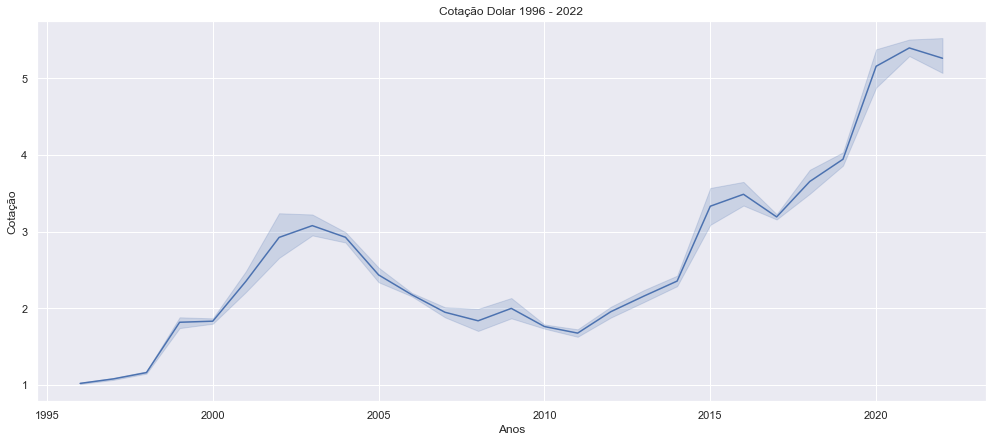

In [66]:
# Configurando tema
sns.set_theme(style="darkgrid")

# Configurando tamanho da figura
fig, ax = plt.subplots(figsize=(17,7))

sns.lineplot(data=df_dolar[['ano','valor']],y='valor',x='ano')
ax.set_title("Cotação Dolar 1996 - 2022")
ax.set_ylabel("Cotação")
ax.set_xlabel("Anos")
plt.grid(True)

plt.show()

**Mergiando os datasets**

In [67]:
df_produto = df_produto.merge(df_dolar,left_on=['CO_ANO','CO_MES'],right_on=['ano','mes'])

In [68]:
df_produto.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO,index,ano,mes,valor
0,2012,2,73269090,10,399,GO,4,817600,27,27,1560,731,2,188,2012,2,1.717316
1,2012,2,73181200,10,160,PR,1,917800,9366,9366,55025,400,0,188,2012,2,1.717316
2,2012,2,85411019,11,160,PR,1,917800,420650,921,36604,312,66,188,2012,2,1.717316
3,2012,2,85322410,11,455,RS,4,1017600,598000,107,6634,994,20,188,2012,2,1.717316
4,2012,2,73269090,10,23,CE,4,317700,2,2,592,18,1,188,2012,2,1.717316


**Colunas a serem removidas**

* CO_NCM
* CO_UNID
* index

Por ter sido especificado a mercadoria, não há necessidade de manter essas colunas na tabela e também por outras serem de identificação da posição na tabela anterior. Além disso, a renomeação de "valor" para "COTACAO" a fim de referenciar à variação do dolar naquele período.

In [69]:
df_produto.drop(['ano','mes','CO_NCM','CO_UNID','index'],axis=1,inplace=True)
df_produto.rename({'valor':'COTACAO'},axis=1,inplace=True)

**Removendo valores de frete iguais a 0**

In [70]:
df_produto = df_produto[df_produto.VL_FRETE != 0]
df_produto.reset_index(drop=True,inplace=True)

**Mapeando as SG_UF_NCM para números**

É necessário mapear para que o cálculo das correlações seja possível

In [71]:
def mudanca_uf(df_base:pd.DataFrame):
    aux_dict = dict(zip(list(df_base.SG_UF_NCM.value_counts().index),range(len(df_base.SG_UF_NCM.value_counts()))))
    try:
        df_base.SG_UF_NCM = df_base.SG_UF_NCM.apply(lambda x: aux_dict[x])
    except:
        pass

mudanca_uf(df_produto)

In [72]:
df_produto.head()

,CO_ANO,CO_MES,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO,COTACAO
0,2012,2,399,9,4,817600,27,27,1560,731,2,1.717316
1,2012,2,160,2,1,917800,9366,9366,55025,400,0,1.717316
2,2012,2,160,2,1,917800,420650,921,36604,312,66,1.717316
3,2012,2,455,5,4,1017600,598000,107,6634,994,20,1.717316
4,2012,2,23,11,4,317700,2,2,592,18,1,1.717316


## Investigação Correlações
---

O Heatmap é um gráfico aconselhável para visualizar as correlações. No caso, analisou-se o nível de correlação com foco no Valor do Frete.

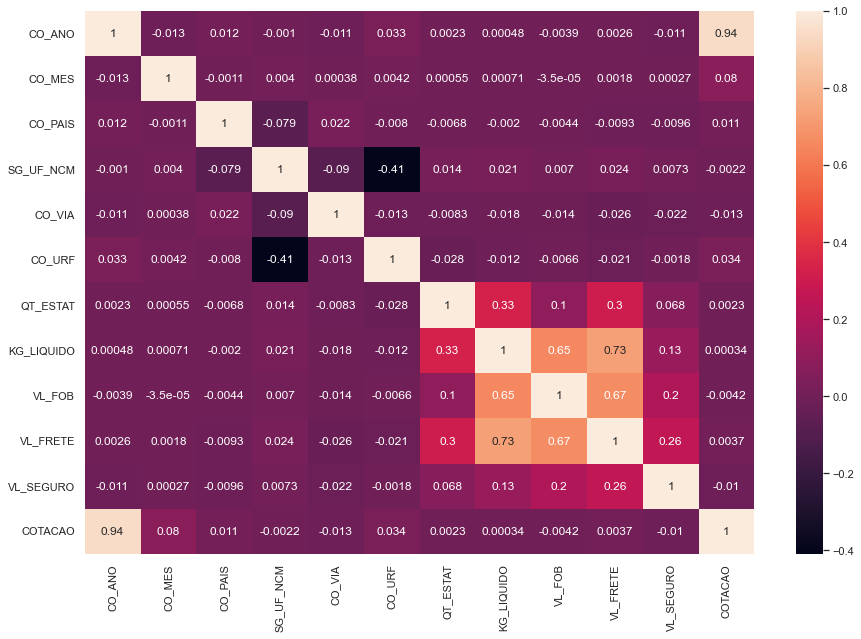

In [73]:
with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(15, 10))

    ax = sns.heatmap(df_produto.corr(),annot=True)

## Análise Gráfica Correlações

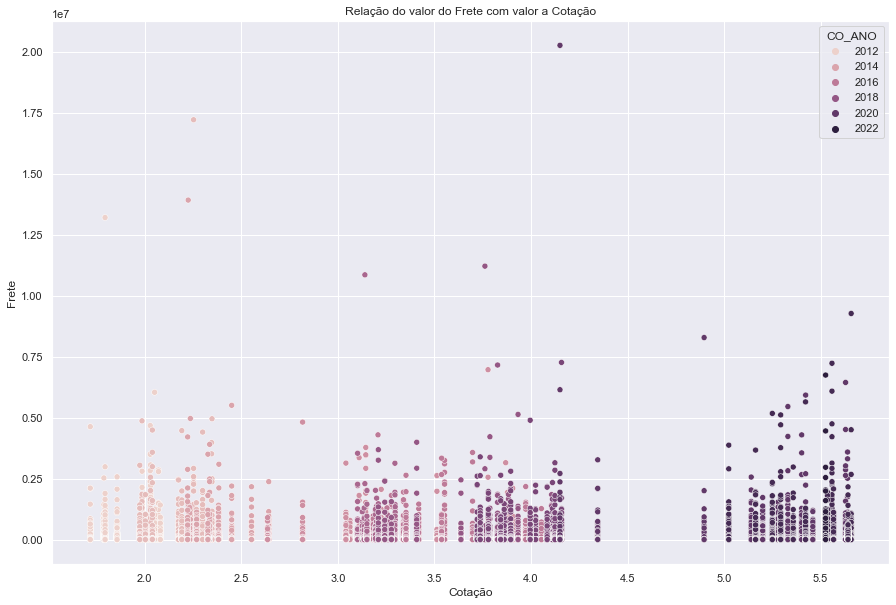

In [74]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=df_produto,x='COTACAO',y='VL_FRETE',hue='CO_ANO')
ax.set_xlabel('Cotação')
ax.set_ylabel('Frete')

ax.set_title('Relação do valor do Frete com valor a Cotação')

plt.show()

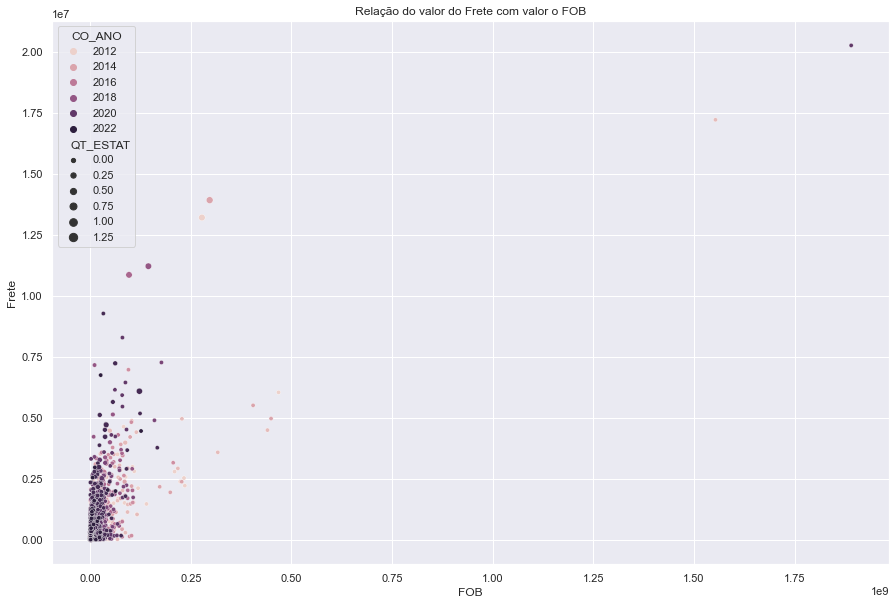

In [75]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=df_produto,x='VL_FOB',y='VL_FRETE',size='QT_ESTAT',hue='CO_ANO')
ax.set_ylabel('Frete')
ax.set_xlabel('FOB')

ax.set_title('Relação do valor do Frete com valor o FOB')

plt.show()

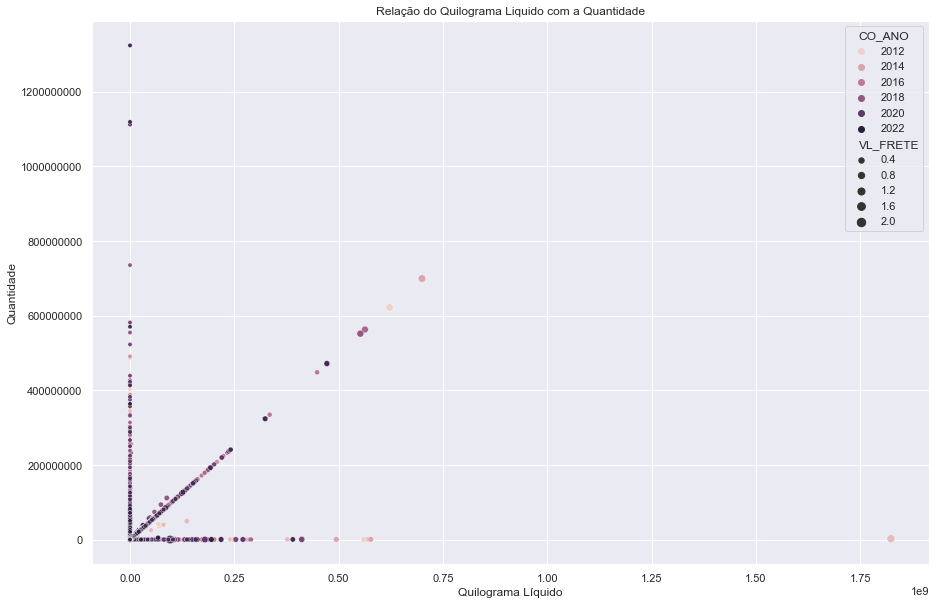

In [76]:
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(data=df_produto,x='KG_LIQUIDO',y='QT_ESTAT',size='VL_FRETE',hue='CO_ANO')
ax.set_xlabel('Quilograma Líquido')
ax.set_ylabel('Quantidade')

ax.set_title('Relação do Quilograma Liquido com a Quantidade')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: int(y)))

## Aprendizado de Máquina
---

**Separando dados para treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_produto.drop(['VL_FRETE'],axis=1), df_produto.VL_FRETE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

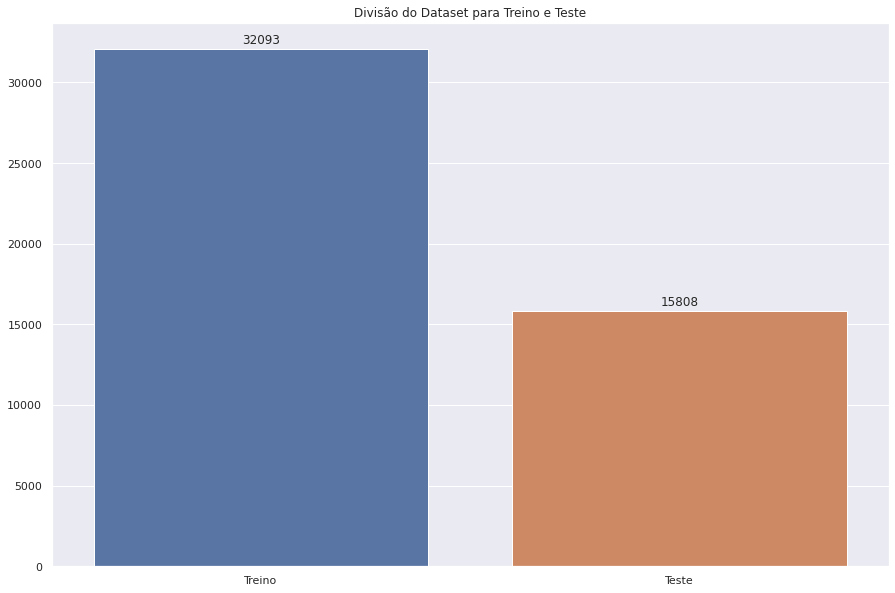

In [ ]:
# Configurando Tema
sns.set_theme(style="darkgrid")

# Configurando tamanho da figura
fig, ax = plt.subplots(figsize=(15,10))
bar = sns.barplot(y=[X_train.shape[0],X_test.shape[0]],x=['Treino','Teste'])

for p in bar.patches:
    bar.annotate(int(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
ax.set_title("Divisão do Dataset para Treino e Teste")
plt.show()

## Treinamento

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score

In [ ]:
def treinamento_metricas(clf,X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    predict = clf.predict(X_test)
    r2 = r2_score(y_test, predict)
    mae = median_absolute_error(y_test, predict)
    print(f'\nR2: {r2}\nMAE: {mae}\n')

    soma = 0
    regr_y_test = []
    for val in y_test:
        soma += val
        regr_y_test.append(soma)

    soma = 0
    regr_y_predict = []
    for val in clf.predict(X_test):
        soma += val
        regr_y_predict.append(soma)

    # Configurando Tema
    sns.set_theme(style="darkgrid")

    # Configurando grafico
    fig, ax = plt.subplots(figsize=(15,10))

    plt.plot(range(len(regr_y_test)),regr_y_test,label='Gabarito')

    plt.plot(range(len(regr_y_predict)),regr_y_predict,label='Predição')

    ax.set_title('Reta de predição e gabarito')

    plt.legend()
    plt.show()
    

## Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svm = SVR(verbose=True)

[LibSVM]
R2: 0.008986784766757405
MAE: 83.68398140119098



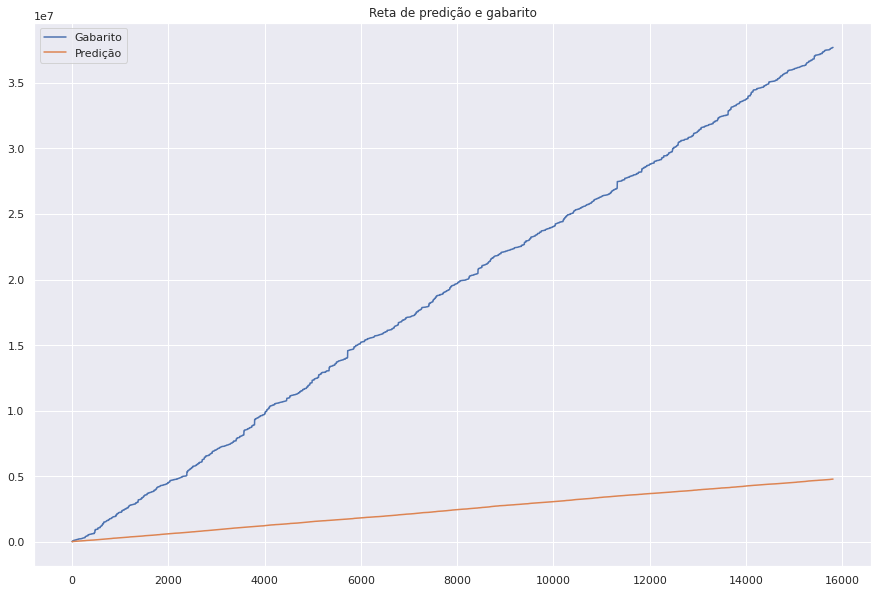

In [ ]:
treinamento_metricas(svm,X_train, X_test, y_train, y_test)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


R2: 0.7550720159396431
MAE: 490.78762499932054



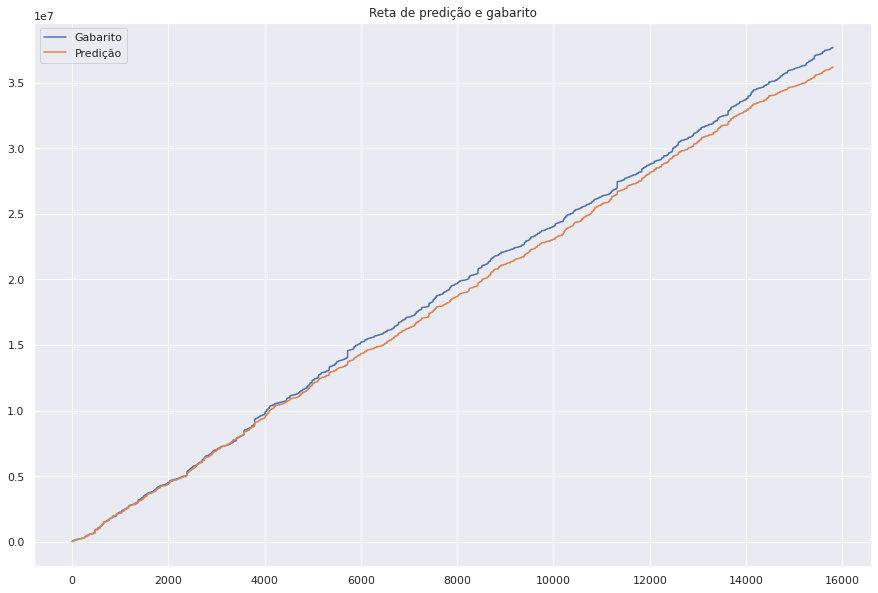

In [ ]:
treinamento_metricas(reg,X_train, X_test, y_train, y_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



R2: -6.745075287297893
MAE: 123.0



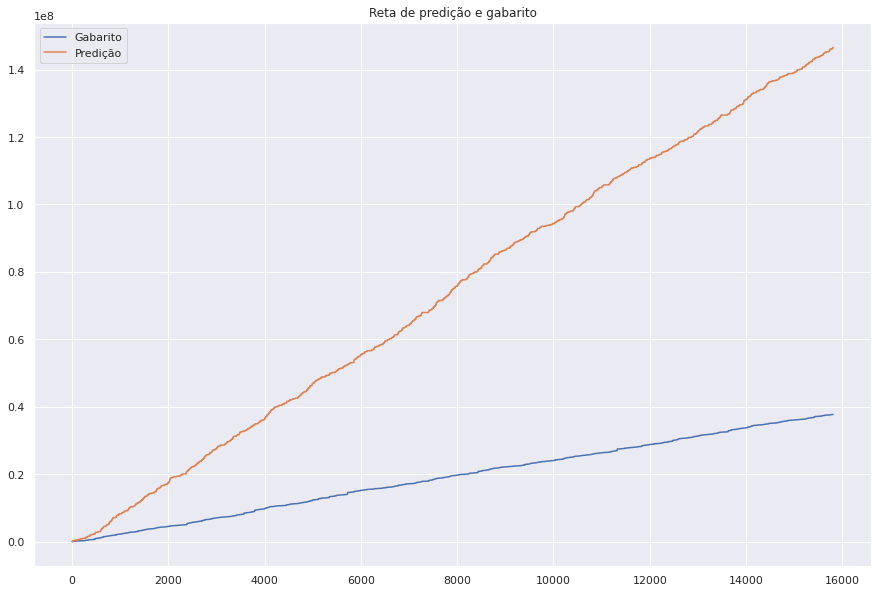

In [ ]:
treinamento_metricas(lreg,X_train, X_test, y_train, y_test)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor()


R2: 0.9287078262871042
MAE: 68.5



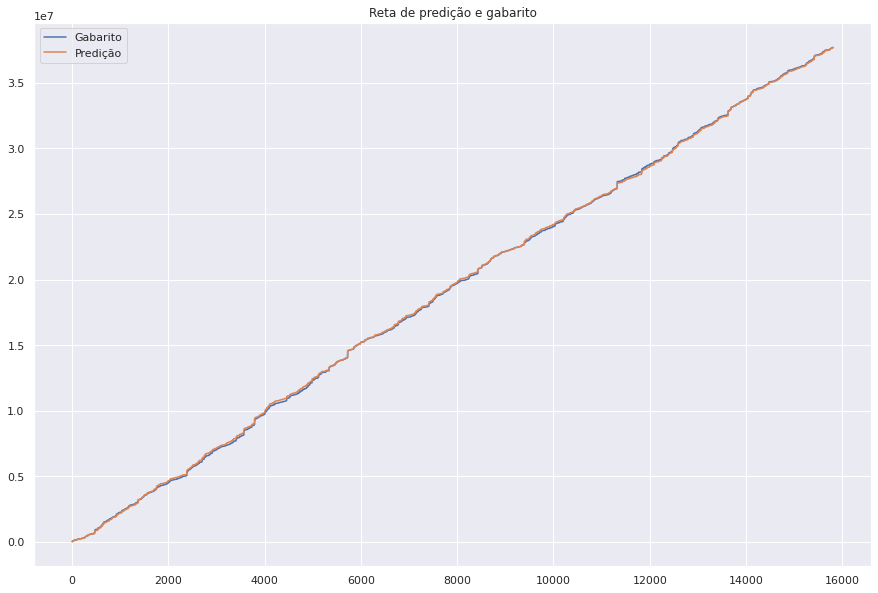

In [ ]:
treinamento_metricas(tree,X_train, X_test, y_train, y_test)

## K-Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor()


R2: 0.7679934388397436
MAE: 130.8



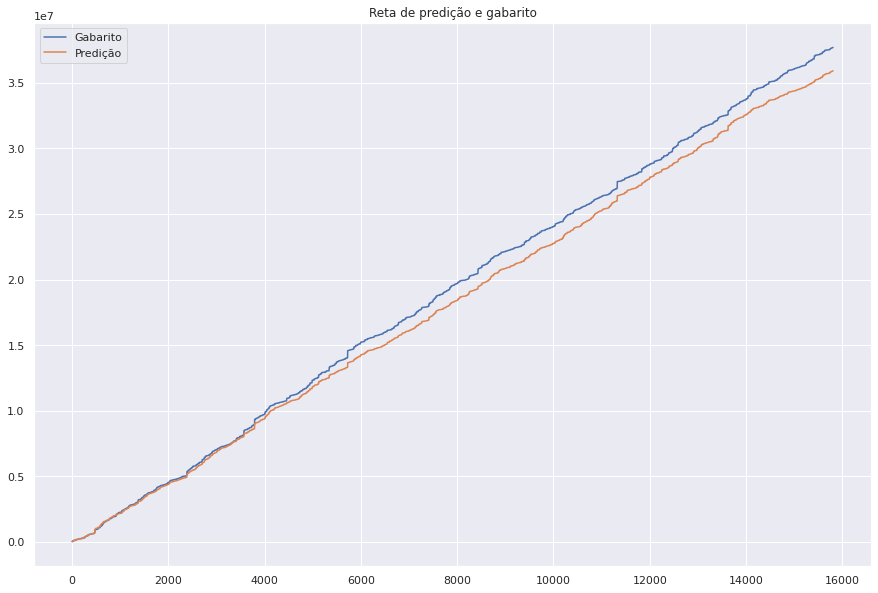

In [ ]:
treinamento_metricas(knn,X_train, X_test, y_train, y_test)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state=42)


R2: 0.9578115151906679
MAE: 60.440000000000005



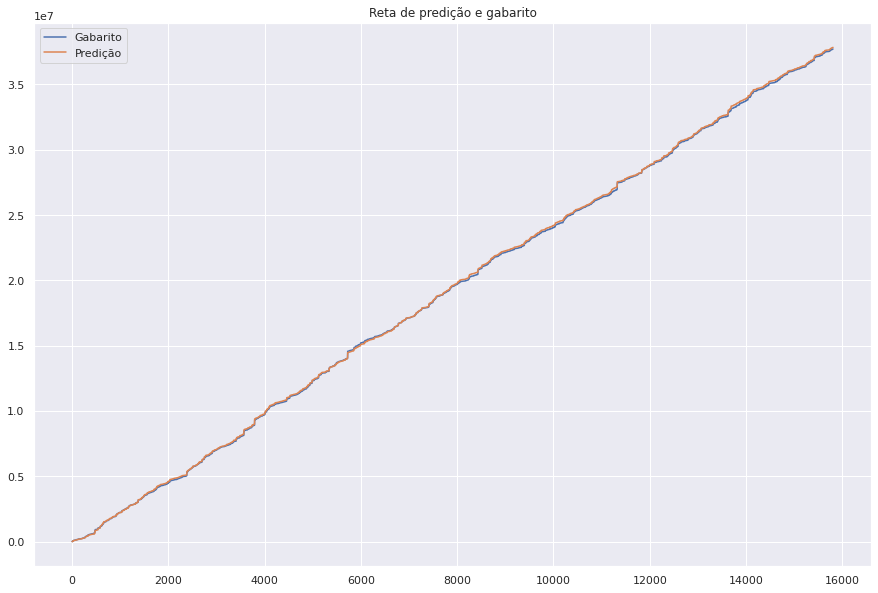

In [ ]:
treinamento_metricas(rfr,X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['squared_error', 'absolute_error', 'poisson']
}
CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:


CV_rfc.best_params_

